# Machine Learning Portfolio 1

|Name|Github|Kaggle|
|----|------|------|
|Henry Lau|HenryLau08|Henry Lau|
|Mohamed Belaachir|mobelaachir|mobelaachir|
|...|...|...|
|...|...|...|

## Table of Contents
- [Data Overview](#data-overview)
- [Exploratory Data Analysis](#exploratory-data-analysis)
- [Modeling](#modeling)
    - [K-Nearest Neighbours](#k-nearest-neighbors)
    - [Logistic Regression](#logistic-regression)
    - [SVM](#svm)
    - [Decision Tree](#decision-tree)
    - [Ensembles](#ensembles)
        - [Random Forest](#random-forest)
        - [Gradient Boosted Decision Trees](#gradient-boosted-decision-trees)
        - [XGBoost](#xgboost)
    - [Self-Assembled Ensemble](#self-assembled-ensemble)
- [Results](#results)
- [Conclusion & Advice](#conclusion--advice)
- [Sources](#sources)

In [123]:
# Libraries
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [30]:
pd.set_option('display.max_columns', None)

train = pd.read_csv('train.csv', index_col='id').sort_index()
test = pd.read_csv('test.csv', index_col='id')

## Data Overview

In [31]:
submission = pd.read_csv('sample_submission.csv')
display(submission)

,id,stroke
0,32840,1
1,45158,0
2,56105,1
3,3112,0
4,35224,1
...,...,...
8383,60672,0
8384,25989,0
8385,34072,1
8386,32400,0


In [32]:
print('Train Data')
display(train.head(10))
print('Test Data')
display(test.head(10))

Train Data


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
id,,,,,,,,,,,,,,,,,,,,,
1,80.0,0,1,67.45,25.6,True,False,False,False,True,False,False,False,True,False,False,True,False,True,False,0
7,44.0,0,0,222.75,19.6,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False,0
8,79.0,0,0,99.23,25.1,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,0
9,44.0,0,0,125.44,35.5,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,0
10,34.0,0,0,89.11,28.0,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False,0
20,36.0,0,0,89.79,27.3,False,True,False,False,True,True,False,False,False,False,False,True,False,False,True,0
22,5.0,0,0,100.81,20.6,False,True,False,True,False,False,False,False,False,True,True,False,False,False,False,0
23,68.0,0,0,75.91,21.8,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,0
24,72.0,0,1,113.65,27.4,True,False,False,False,True,False,False,False,True,False,True,False,True,False,False,0


Test Data


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,,,
32840,52.0,0,0,97.32,21.8,True,False,False,False,True,False,False,True,False,False,False,True,False,False,True
45158,30.0,0,0,227.99,47.7,True,False,False,False,True,False,False,True,False,False,False,True,False,False,True
56105,26.0,0,0,113.28,24.4,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False
3112,24.0,0,0,79.15,21.0,True,False,False,False,True,False,False,True,False,False,False,True,True,False,False
35224,63.0,0,0,89.69,33.3,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False
33344,43.0,0,1,96.93,29.6,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True
35699,16.0,0,0,82.25,30.9,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False
48440,38.0,0,0,78.90,25.3,True,False,False,True,False,True,False,False,False,False,True,False,False,True,False
32256,23.0,0,0,72.60,31.2,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False


## Exploratory Data Analysis

In [33]:
display(train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 33550 entries, 1 to 72943
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             33550 non-null  float64
 1   hypertension                    33550 non-null  int64  
 2   heart_disease                   33550 non-null  int64  
 3   avg_glucose_level               33550 non-null  float64
 4   bmi                             33550 non-null  float64
 5   gender_Female                   33550 non-null  bool   
 6   gender_Male                     33550 non-null  bool   
 7   gender_Other                    33550 non-null  bool   
 8   ever_married_No                 33550 non-null  bool   
 9   ever_married_Yes                33550 non-null  bool   
 10  work_type_Govt_job              33550 non-null  bool   
 11  work_type_Never_worked          33550 non-null  bool   
 12  work_type_Private               33550

None

In [34]:
train.duplicated().sum() # check for duplicated rows

0

In [35]:
train[train.select_dtypes('bool').columns] = train[train.select_dtypes('bool').columns].astype('int64')
test[test.select_dtypes('bool').columns] = test[test.select_dtypes('bool').columns].astype('int64')

In [36]:
def plots(df):
    # Select float columns for histograms
    float_cols = df.select_dtypes('float64').columns
    # Select integer columns for count plots
    int_cols = df.select_dtypes('int64').columns

    # Set number of plots per row
    num_plots_per_row = 3

    # Plot histograms for float columns
    if len(float_cols) > 0:
        num_rows_float = (len(float_cols) + num_plots_per_row - 1) // num_plots_per_row  # Calculate required rows
        fig, axs = plt.subplots(num_rows_float, num_plots_per_row, figsize=(15, num_rows_float * 5))
        axs = axs.flatten()  # Flatten the axis for easy iteration

        for i, col in enumerate(float_cols):
            sns.histplot(data=df, x=col, ax=axs[i])
            axs[i].set_title(col)
        plt.tight_layout()  # Adjust layout to avoid overlap
        plt.show()

    # Plot count plots for integer columns
    if len(int_cols) > 0:
        num_rows_int = (len(int_cols) + num_plots_per_row - 1) // num_plots_per_row  # Calculate required rows
        fig, axs = plt.subplots(num_rows_int, num_plots_per_row, figsize=(15, num_rows_int * 5))
        axs = axs.flatten()  # Flatten the axis for easy iteration

        for i, col in enumerate(int_cols):
            sns.countplot(data=df, x=col, ax=axs[i])
            axs[i].set_title(col)
        plt.tight_layout()  # Adjust layout to avoid overlap
        plt.show()

Average Glucose Level:
- Normal: 70-140
- Prediabetes: 141-200
- Diabetes: 200+

https://www.youtube.com/watch?v=f6mGx8Uc_jk

BMI:
- Underweight: <18.5
- Optimum range: 18.5-24.9
- Overweight: 25-29.9
- Class 1 obesity: 30-34.9
- Class 2 obesity: 35-39.9
- Class 3 obesity: 40+

https://my.clevelandclinic.org/health/articles/9464-body-mass-index-bmi


In [39]:
def glucose_level(x):
    if x < 70:
        return 'low'
    elif x <= 140:
        return 'normal'
    elif x <= 200:
        return 'high'
    else:
        return 'very high'
    
def bmi_range(x):
    if x < 18.5:
        return 'underweight'
    elif x < 25:
        return 'normal'
    elif x < 30:
        return 'overweight'
    elif x < 35:
        return 'class 1 obesity'
    elif x < 40:
        return 'class 2 obesity'
    else:
        return 'class 3 obesity'
    
train['avg_glucose_level'] = train['avg_glucose_level'].apply(glucose_level)
train['bmi'] = train['bmi'].apply(bmi_range)

display(train.head(10))

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke,avg_glucose_level_encoded,bmi_encoded
id,,,,,,,,,,,,,,,,,,,,,,,
1,80.0,0,1,low,overweight,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,NaN,NaN
7,44.0,0,0,very high,normal,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,NaN,NaN
8,79.0,0,0,normal,overweight,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,NaN,NaN
9,44.0,0,0,normal,class 2 obesity,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,NaN,NaN
10,34.0,0,0,normal,overweight,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,NaN,NaN
20,36.0,0,0,normal,overweight,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,NaN,NaN
22,5.0,0,0,normal,normal,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,NaN,NaN
23,68.0,0,0,normal,normal,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,NaN,NaN
24,72.0,0,1,normal,overweight,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,NaN,NaN


In [40]:
glucose_mapping = {'low': 0,
                   'normal': 1,
                   'high': 2,
                   'very high': 3}

bmi_mapping = {'underweight': 0,
               'normal': 1,
               'overweight': 2,
               'class 1 obesity': 3,
               'class 2 obesity': 4,
               'class 3 obesity': 5}

train['avg_glucose_level_encoded'] = train['avg_glucose_level'].map(glucose_mapping)
train['bmi_encoded'] = train['bmi'].map(bmi_mapping)

print(glucose_mapping, bmi_mapping)

display(train.head(10))

{'low': 0, 'normal': 1, 'high': 2, 'very high': 3} {'underweight': 0, 'normal': 1, 'overweight': 2, 'class 1 obesity': 3, 'class 2 obesity': 4, 'class 3 obesity': 5}


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke,avg_glucose_level_encoded,bmi_encoded
id,,,,,,,,,,,,,,,,,,,,,,,
1,80.0,0,1,low,overweight,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,2
7,44.0,0,0,very high,normal,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,3,1
8,79.0,0,0,normal,overweight,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,2
9,44.0,0,0,normal,class 2 obesity,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,4
10,34.0,0,0,normal,overweight,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,2
20,36.0,0,0,normal,overweight,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,2
22,5.0,0,0,normal,normal,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1
23,68.0,0,0,normal,normal,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1
24,72.0,0,1,normal,overweight,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,2


In [121]:
test['avg_glucose_level'] = test['avg_glucose_level'].apply(glucose_level)
test['bmi'] = test['bmi'].apply(bmi_range)
test['avg_glucose_level_encoded'] = test['avg_glucose_level'].map(glucose_mapping)
test['bmi_encoded'] = test['bmi'].map(bmi_mapping)

In [45]:
TRAIN = train.drop(['avg_glucose_level','bmi'], axis=1)

In [46]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the data
train_scaled = scaler.fit_transform(TRAIN.select_dtypes('float64'))

TRAIN[TRAIN.select_dtypes('float64').columns] = train_scaled
display(TRAIN.head(10))

,age,hypertension,heart_disease,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke,avg_glucose_level_encoded,bmi_encoded
id,,,,,,,,,,,,,,,,,,,,,
1,0.975586,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,2
7,0.536133,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,3,1
8,0.963379,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,2
9,0.536133,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,4
10,0.414062,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,2
20,0.438477,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,2
22,0.060059,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1
23,0.829102,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1
24,0.877930,0,1,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,2


In [124]:
scaler = MinMaxScaler()

# Fit and transform the data
test_scaled = scaler.fit_transform(test.select_dtypes('float64'))

test[test.select_dtypes('float64').columns] = test_scaled

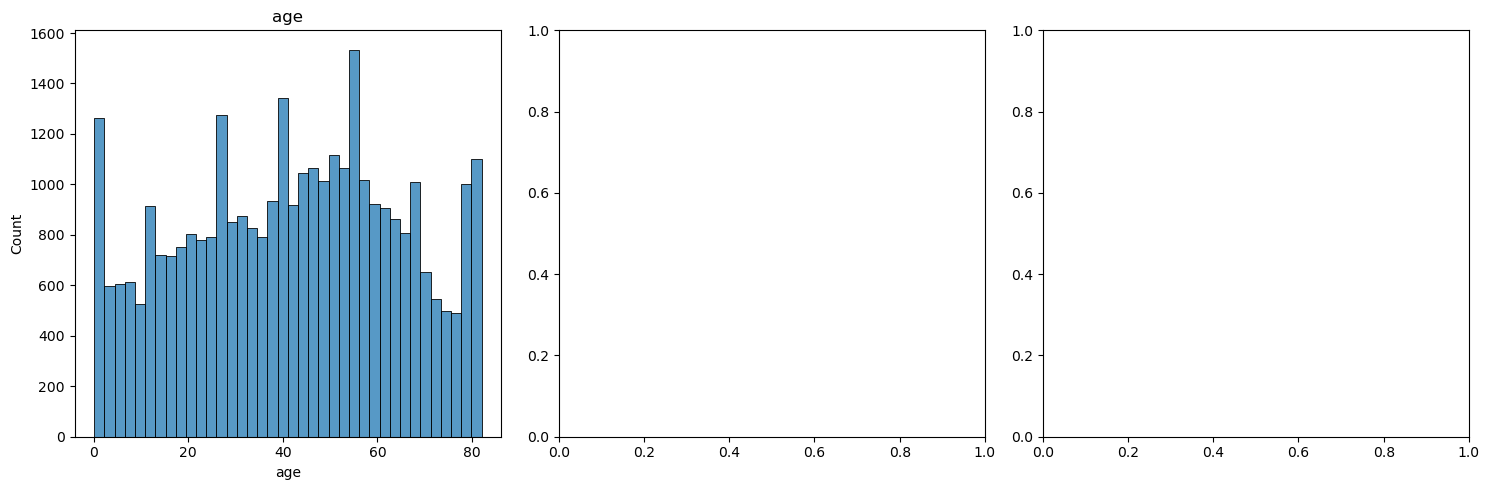

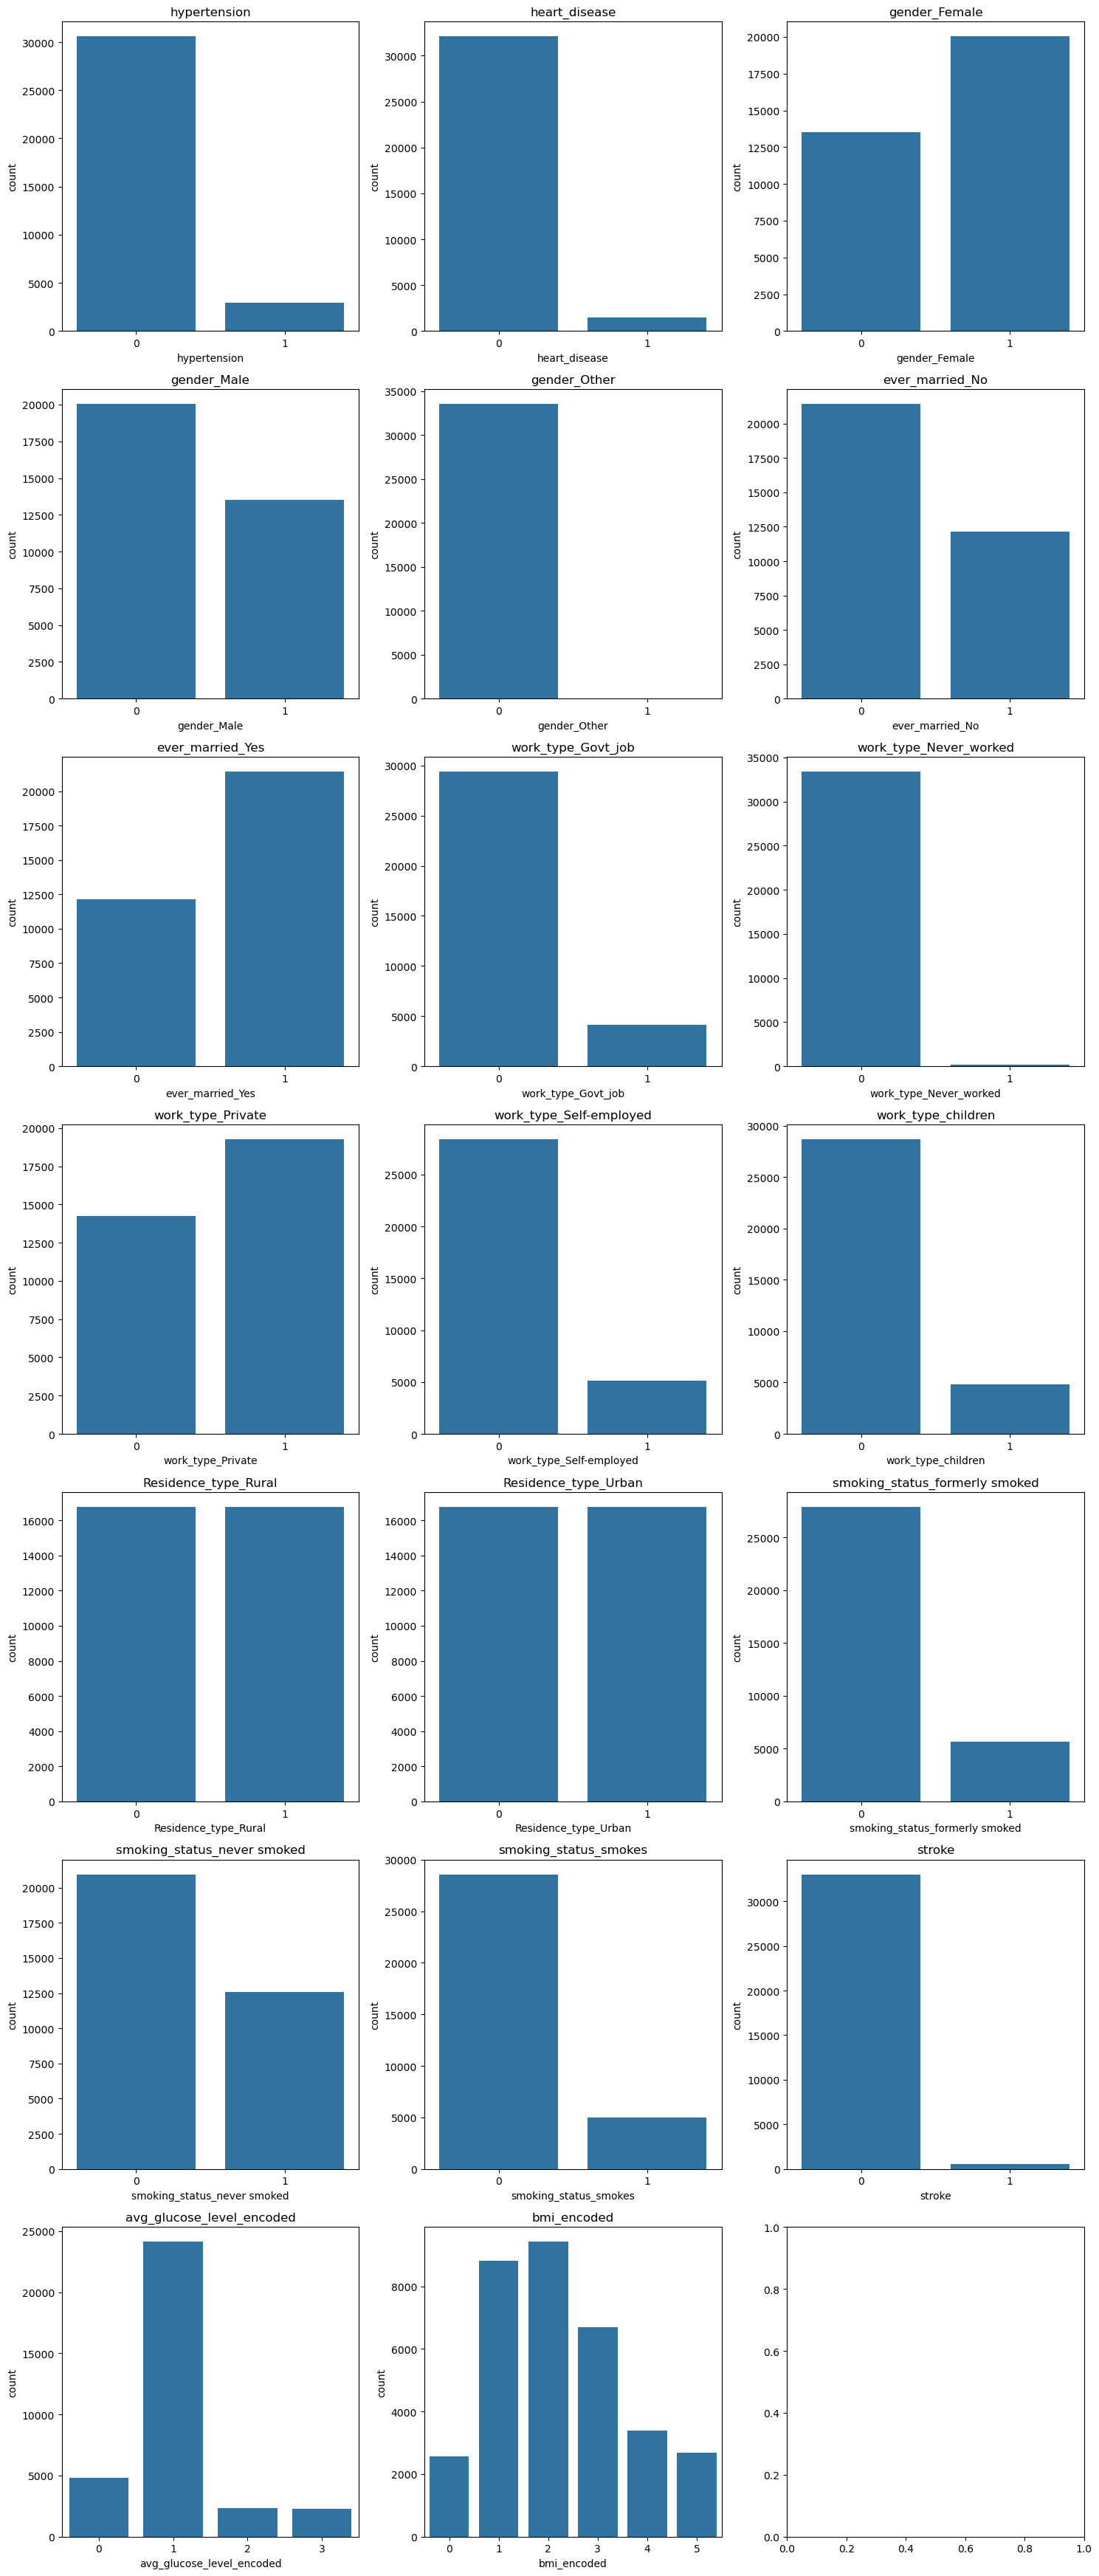

In [47]:
plots(train)

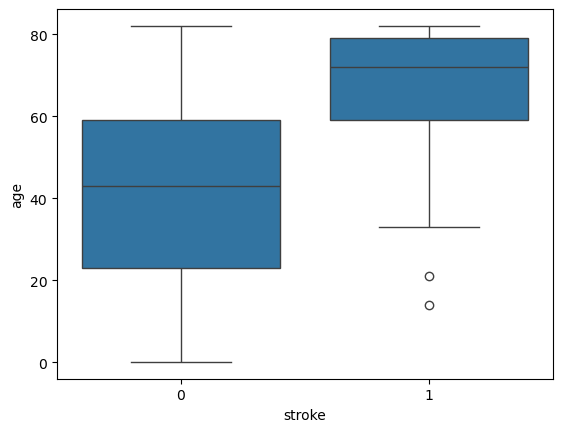

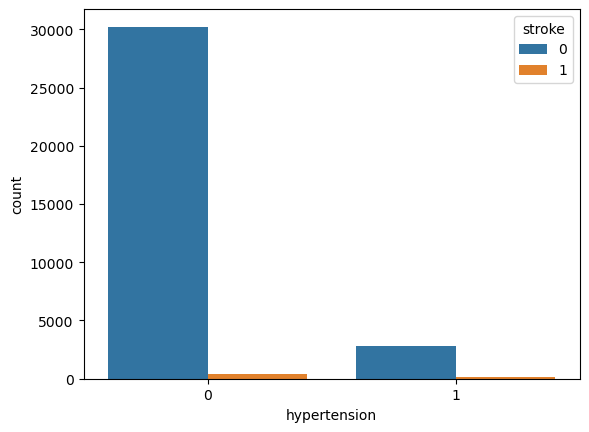

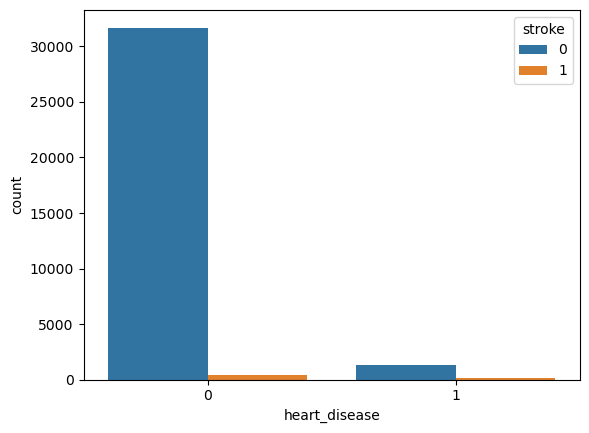

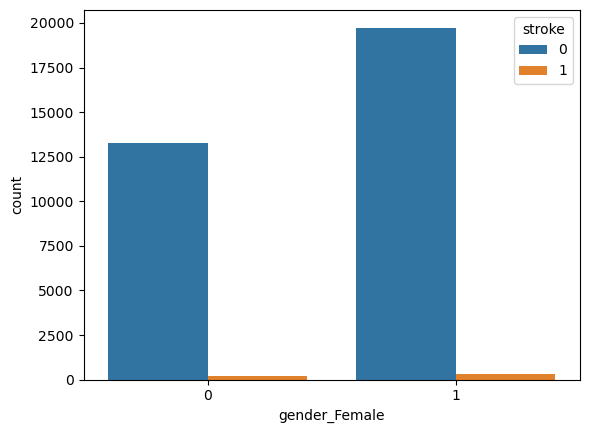

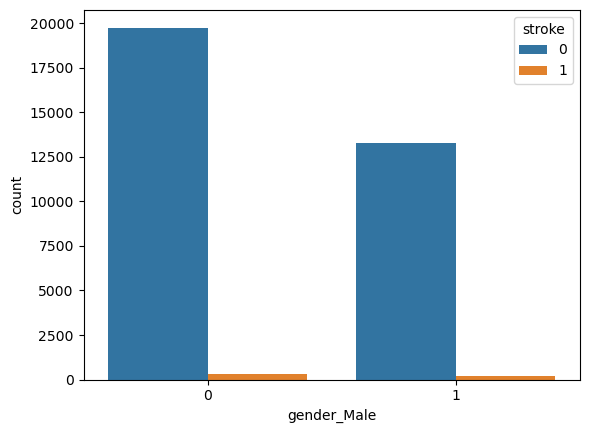

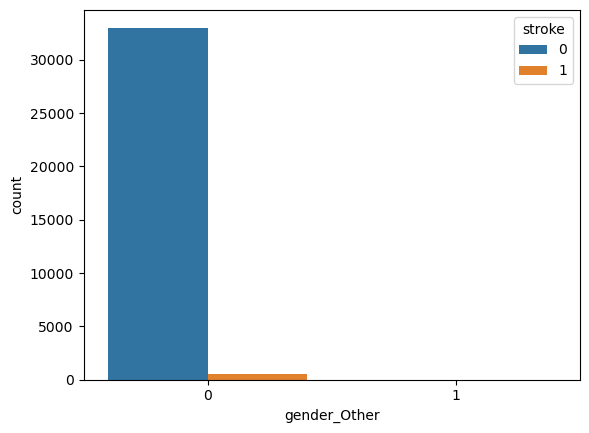

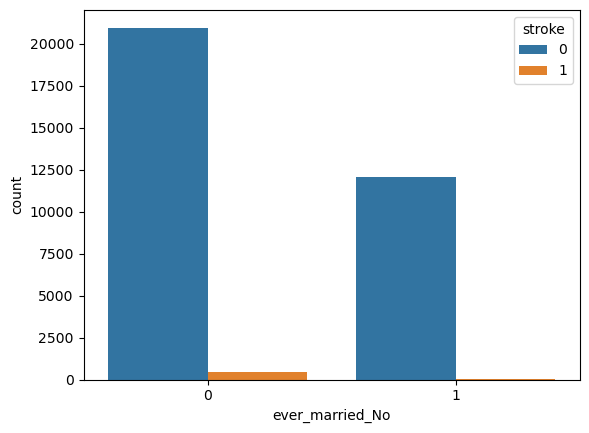

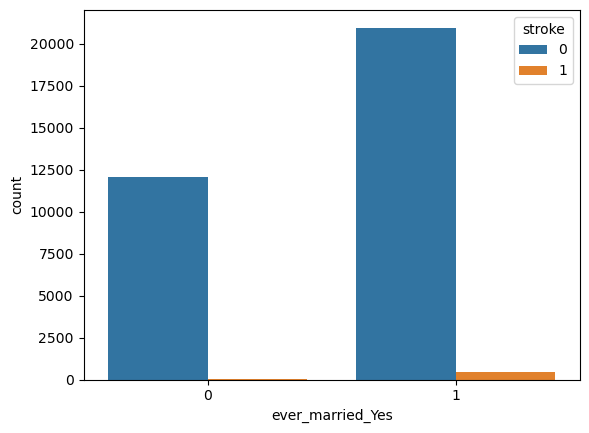

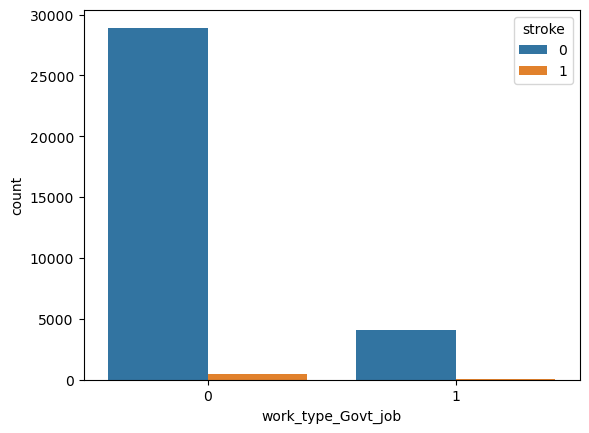

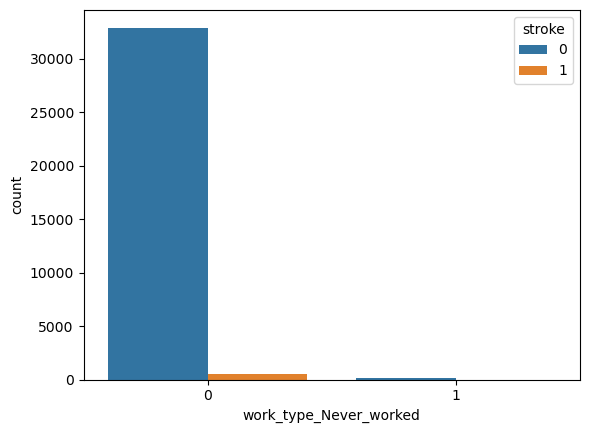

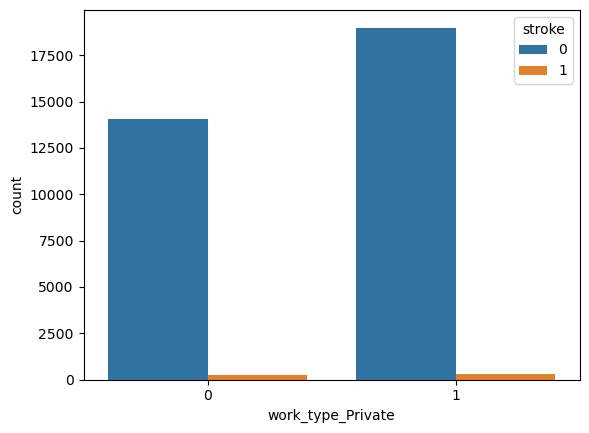

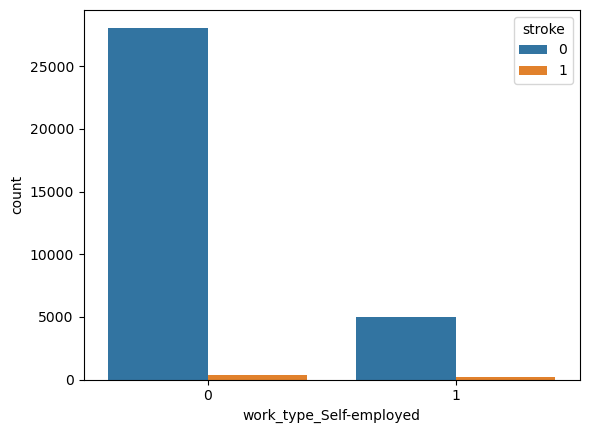

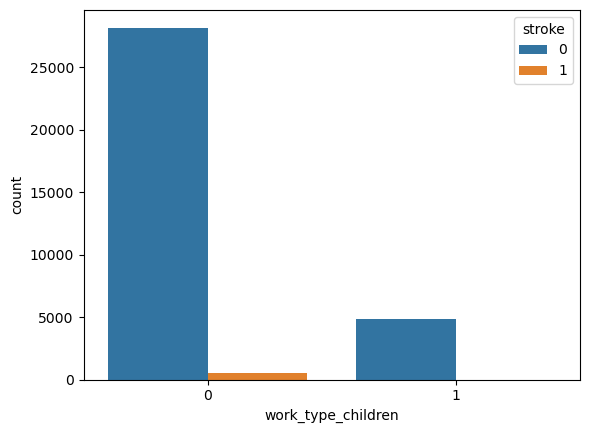

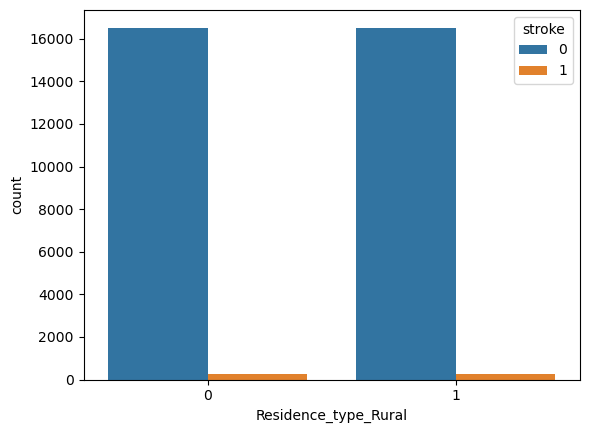

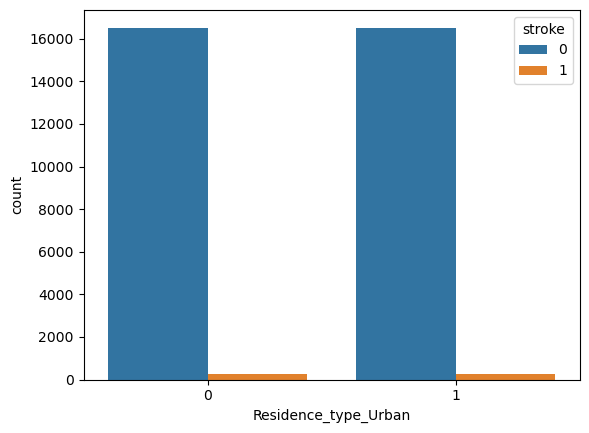

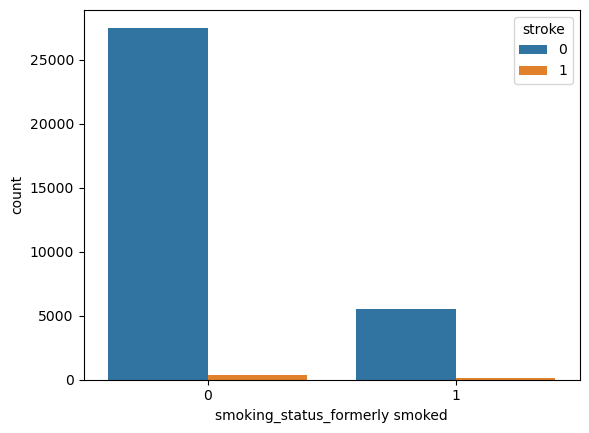

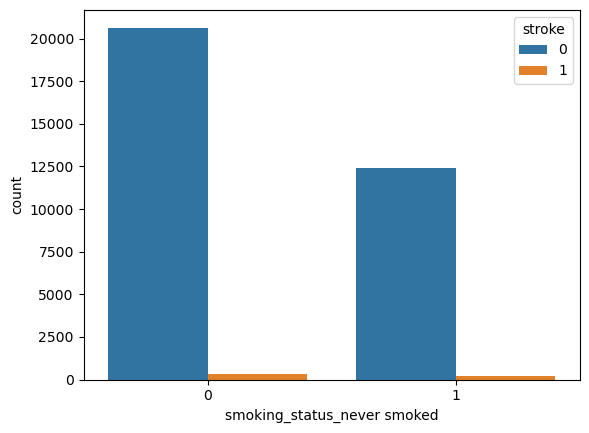

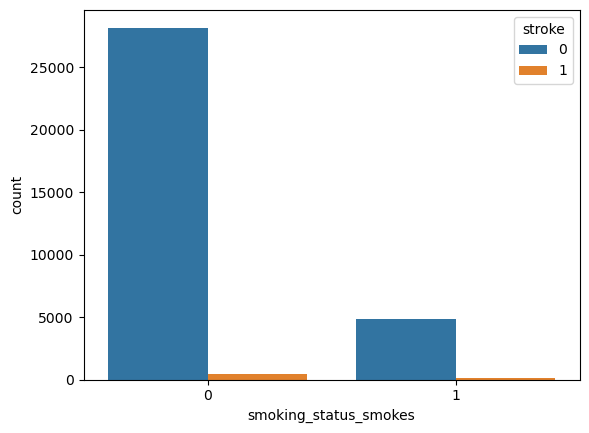

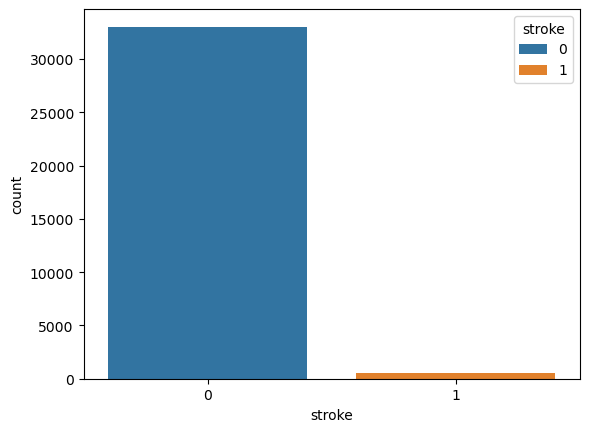

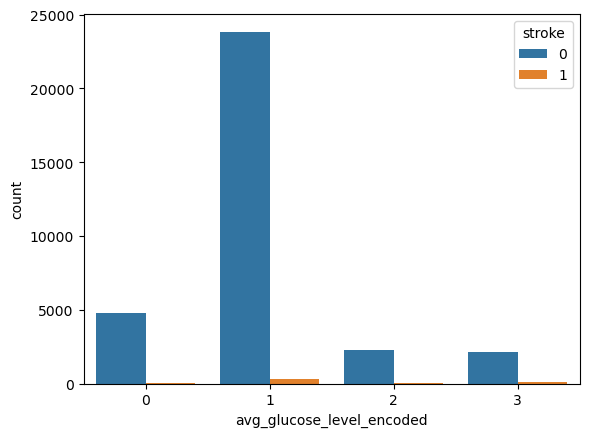

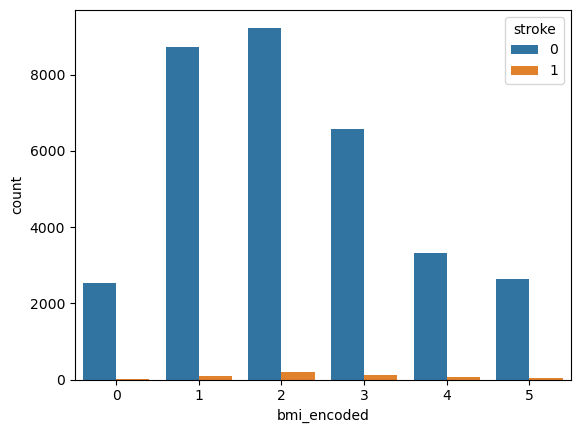

In [133]:
float_cols = train.select_dtypes('float64').columns
int_cols = train.select_dtypes('int64').columns

for col in float_cols:
    sns.boxplot(x='stroke', y=col, data=train)
    plt.show()

for col in int_cols:
    sns.countplot(x=col, hue='stroke', data=train)
    plt.show()

In [145]:
# def get_outlier_bounds(df, col=''):
#     # Calculate Q1 (25th percentile) and Q3 (75th percentile)
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1

#     # Calculate the lower and upper bounds
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     return lower_bound, upper_bound

In [148]:
# stroke0 = train[train['stroke']==0]

# glucose0_lower, glucose0_upper = get_outlier_bounds(stroke0, 'avg_glucose_level')

# glucose_outliers_indexes = stroke0[(stroke0['avg_glucose_level'] < glucose0_lower) | (stroke0['avg_glucose_level'] > glucose0_upper)].index

In [149]:
# bmi_lower, bmi_upper = get_outlier_bounds(train, 'bmi')

# bmi_outliers_indexes = train[(train['bmi'] < bmi_lower) | (train['bmi'] > bmi_upper)].index

In [150]:
# set_indexes = set(glucose_outliers_indexes.append(bmi_outliers_indexes))
# filtered_train = train.drop(set_indexes)
# display(filtered_train)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
id,,,,,,,,,,,,,,,,,,,,,
1,0.975586,0,1,0.054903,0.177143,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0
8,0.963379,0,0,0.195163,0.171429,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
9,0.536133,0,0,0.310839,0.290286,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
10,0.414062,0,0,0.150499,0.204571,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
20,0.438477,0,0,0.153500,0.196571,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72938,0.487305,0,0,0.342087,0.342857,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
72939,0.414062,0,0,0.122297,0.185143,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
72940,0.023438,0,0,0.211448,0.085714,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0


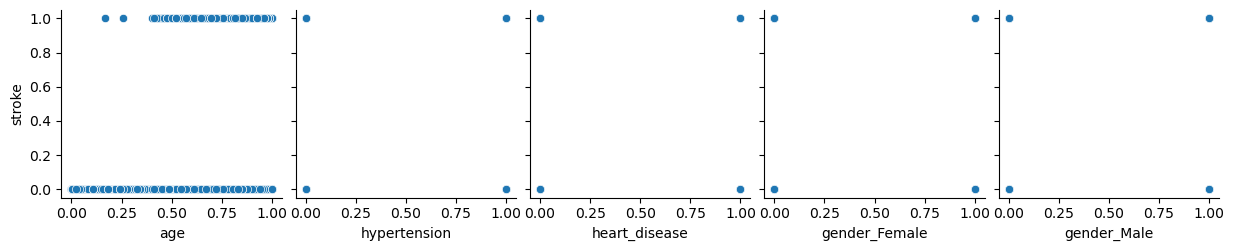

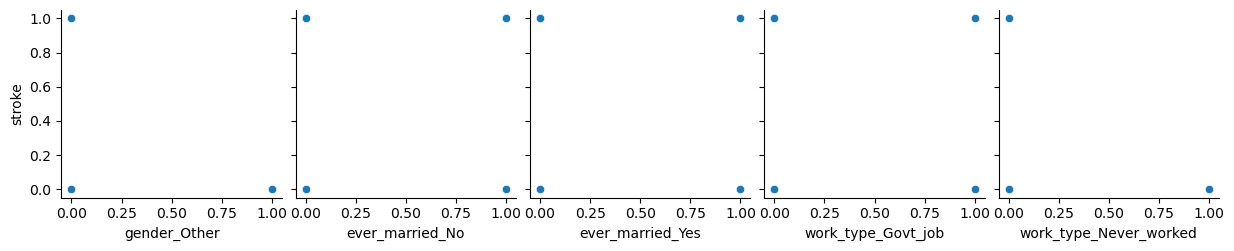

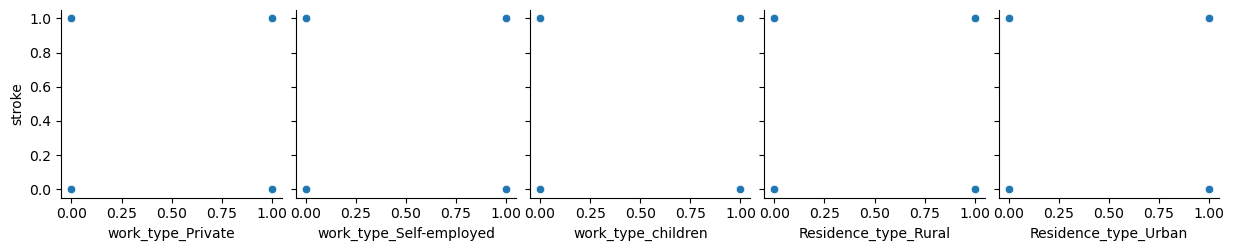

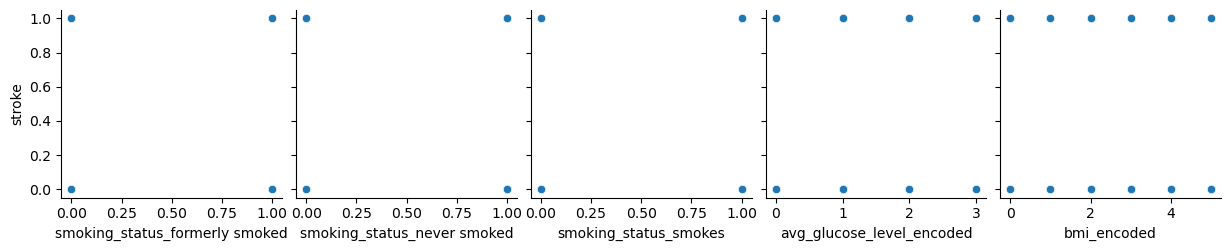

In [91]:
X = TRAIN.drop('stroke', axis=1)
y = TRAIN['stroke']


sns.pairplot(TRAIN, x_vars=X.columns[:5], y_vars='stroke')
sns.pairplot(TRAIN, x_vars=X.columns[5:10], y_vars='stroke')
sns.pairplot(TRAIN, x_vars=X.columns[10:15], y_vars='stroke')
sns.pairplot(TRAIN, x_vars=X.columns[15:], y_vars='stroke')
plt.show()

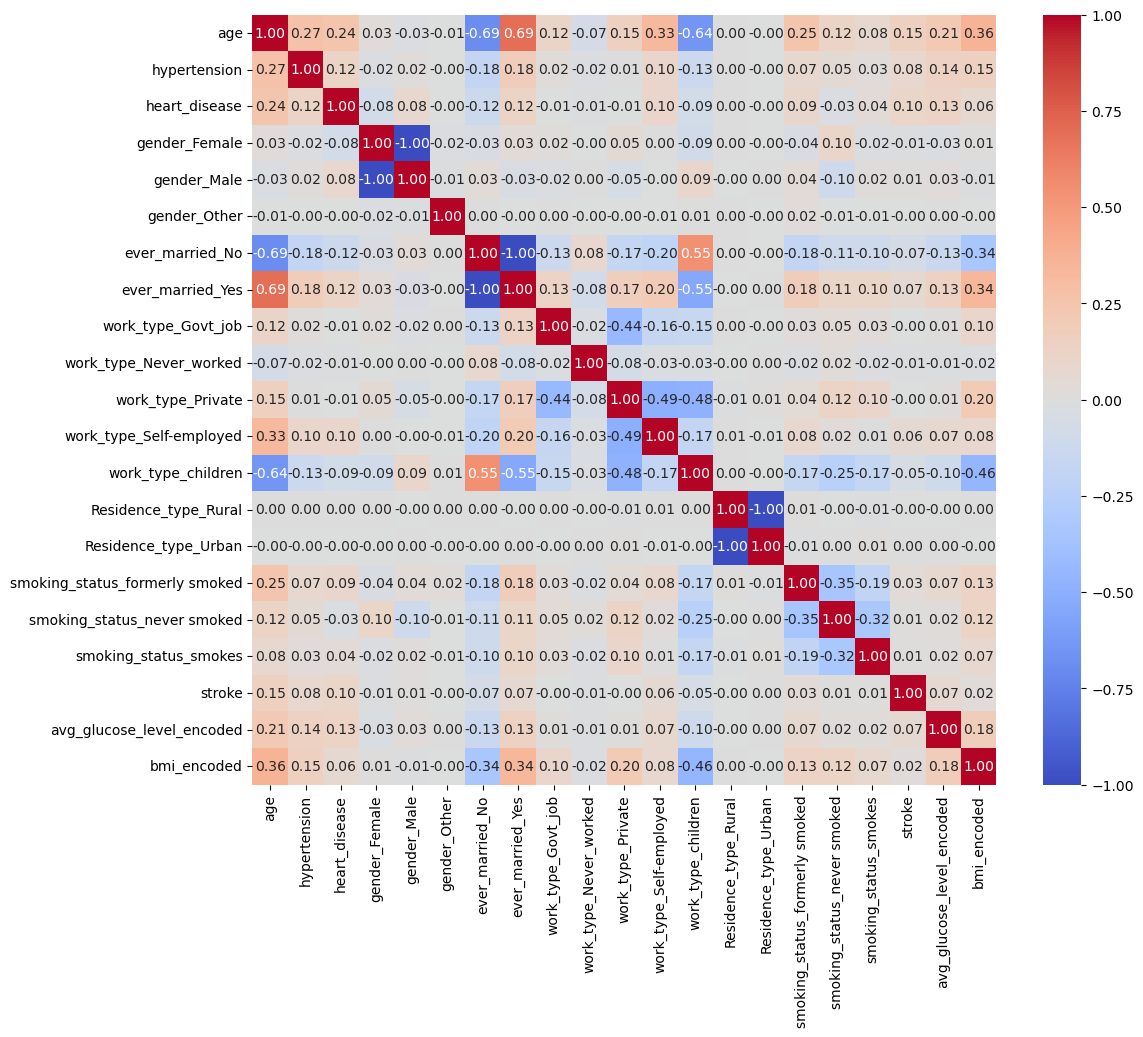

In [106]:
corr = TRAIN.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [29]:
# remove_cols = ['gender_Male','gender_Other','ever_married_No','smoking_status_never smoked','Residence_type_Urban','work_type_Never_worked']
# train = train[(train['gender_Other']==0)]
# train = train.drop(remove_cols, axis=1)
# test = test.drop(remove_cols, axis=1)

In [49]:
TRAIN.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33550 entries, 1 to 72943
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             33550 non-null  float64
 1   hypertension                    33550 non-null  int64  
 2   heart_disease                   33550 non-null  int64  
 3   gender_Female                   33550 non-null  int64  
 4   gender_Male                     33550 non-null  int64  
 5   gender_Other                    33550 non-null  int64  
 6   ever_married_No                 33550 non-null  int64  
 7   ever_married_Yes                33550 non-null  int64  
 8   work_type_Govt_job              33550 non-null  int64  
 9   work_type_Never_worked          33550 non-null  int64  
 10  work_type_Private               33550 non-null  int64  
 11  work_type_Self-employed         33550 non-null  int64  
 12  work_type_children              33550

## Modeling

In [114]:
select_cols = ['age','heart_disease','hypertension','avg_glucose_level_encoded','bmi_encoded']


X = TRAIN[select_cols]
# X = TRAIN.drop('stroke', axis=1)
y = TRAIN['stroke']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [115]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

### K-Nearest Neighbors

**UITLEG**

### Logistic Regression

**UITLEG**

In [132]:
log_reg = LogisticRegression(max_iter=1000, penalty='l2', class_weight='balanced')

log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_f1 = f1_score(y_test, log_reg_pred)
print(log_reg_f1)

0.7868820552744259


### SVM

**UITLEG**

### Decision Tree

**UITLEG**

### Ensembles

**UITLEG**

#### Random Forest

In [128]:
rf_model = RandomForestClassifier(max_depth=15, class_weight='balanced')
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_f1 = f1_score(y_test, rf_pred)
print(rf_f1)

0.9052127977673677


#### Gradient Boosted Decision Trees

#### XGBoost

In [127]:
xgb_model = xgb.XGBClassifier(n_estimators=500, 
                              learning_rate= 0.1, 
                              max_depth=4, 
                              reg_lambda=1, 
                              objective='binary:logistic')

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

xgb_f1 = f1_score(y_test, xgb_pred)
print(xgb_f1)

0.8831262939958592


In [33]:
# xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# param_grid = {
#     'n_estimators': [50, 100, 200, 250, 300],
#     'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.8, 0.9, 1.0],
#     'reg_lambda': [0, 1],
#     'reg_alpha': [0, 1],
#     'colsample_bytree': [0.8, 0.9, 1.0]
# }

# grid_search = GridSearchCV(estimator=xgb_model, 
#                            param_grid=param_grid, 
#                            scoring='accuracy', 
#                            cv=5,
#                            verbose=1)

# grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4320 candidates, totalling 21600 fits


Exception ignored on calling ctypes callback function: <bound method DataIter._next_wrapper of <xgboost.data.SingleBatchInternalIter object at 0x00000245B3006870>>
Traceback (most recent call last):
  File "c:\Users\henry_f4yg7pl\anaconda3\Lib\site-packages\xgboost\core.py", line 582, in _next_wrapper
    def _next_wrapper(self, this: None) -> int:  # pylint: disable=unused-argument

KeyboardInterrupt: 


In [95]:
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)

# print(accuracy_score(y_test, y_pred))

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 0.8}
0.9845556358381503


### Self-assembled ensemble

## Results

|Model|f1-score|kaggle score|
|-----|--------|------------|
||||
||||
||||
||||
||||

In [125]:
def submission(model, file_name='submission'):
    y_pred = model.predict(test[select_cols])
    copy_test = test.copy()
    copy_test['stroke'] = y_pred
    sub = copy_test[['stroke']].reset_index()

    os.makedirs('predictions', exist_ok=True)

    csv_file = f'predictions/{file_name}.csv'
    sub.to_csv(csv_file, index=False)
    print(f'Submission saved to {csv_file}')

In [130]:
submission(xgb_model, 'xgb')

Submission saved to predictions/xgb.csv


## Conclusion & Advice

## Sources